<a href="https://colab.research.google.com/github/AEmanuelli/M-moire_Anis_Alexis/blob/main/TME_3_Alexis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AssertionError: 

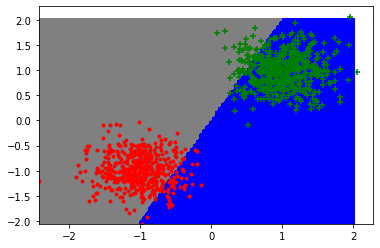

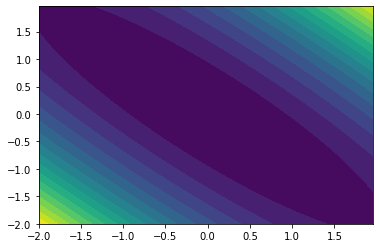

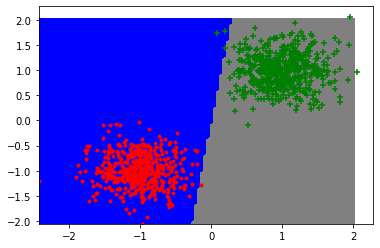

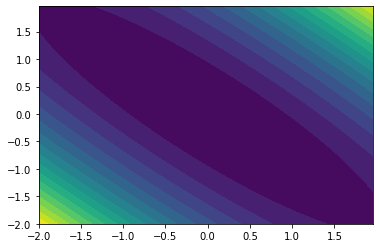

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from mltools import plot_data, plot_frontiere, make_grid, gen_arti


def mse(w,x,y):
    return ((y - np.ndarray.dot(x, w))**2).reshape(-1, 1)

def mse_grad(w,x,y):
    return -2 * np.ndarray.dot(x.T, (y - np.ndarray.dot(x, w)))

def reglog(w,x,y):
    return np.log(1 + np.exp(-y * np.ndarray.dot(x, w))).reshape(-1, 1)

def reglog_grad(w,x,y):
    return -np.ndarray.dot(x.T, y / (1 + np.exp(y * np.ndarray.dot(x, w))))

def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
    assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
    assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
    np.random.seed()


if __name__=="__main__":
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=0.1)
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
    
    plt.figure()
    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w  = np.random.randn(datax.shape[1],1)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
    plot_data(datax,datay)

    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
    
    
    plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)

check_fonctions()
    

In [ ]:
def descente_gradient(datax, datay, f_loss, f_grad, eps, iter):
    # Initialisations
    w = np.zeros(datax.shape[1], 1)
    w_list = []
    loss_list = []
    
    for i in range(iter):
        w -= eps * f_grad(w, datax, datay)
        w_list.append(w)
        loss_list.append(f_loss(w, datax, datay))

    return w, w_list, loss_list


In [ ]:
datax = np.array([[1, 2], [3, 4], [5, 6]])
print(datax.shape)

(3, 2)


In [ ]:
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    if labels is not None:
        labels = labels.reshape(-1)
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])

def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape),colors=('gray','blue'),levels=[-1,0,1])

def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
         #melange de 2 gaussiennes
         xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//2)
         xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//2)
         data=np.vstack((xpos,xneg))
         y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y.reshape(-1, 1)

ValueError: operands could not be broadcast together with shapes (3,) (3,1000) 

In [ ]:
def grad_check(f, f_grad, N=100):
    def check_1d(x):
        x = np.array([x])
        fx = f(x)
        grad = f_grad(x)
        eps = 1e-6
        num_grad = (f(x + eps) - f(x - eps)) / (2 * eps)
        return abs(num_grad - grad) < 1e-5
    
    def check_nd(x):
        x = np.array([x])
        fx = f(x)
        grad = f_grad(x)
        eps = 1e-6
        num_grad = np.zeros_like(grad)
        for i in range(len(x)):
            x_plus = x.copy()
            x_plus[i] += eps
            x_minus = x.copy()
            x_minus[i] -= eps
            num_grad[i] = (f(x_plus) - f(x_minus)) / (2 * eps)
        return np.allclose(num_grad, grad, rtol=1e-5, atol=1e-5)
    
    dim = f_grad.__globals__.get('d', 1)
    checks = [check_1d if dim == 1 else check_nd for _ in range(N)]
    return np.mean([check(np.random.randn(dim)) for check in checks])